In [1]:
# 프로야구 투수 연봉 예측
# 투수 연봉을 예측하기 위한 데이터셋 152개 특성 22개
# 특성: 승, 패, 홈런의 수치, 방어율, 타율 등등 세부정보
# 회귀 분석을 이용
# 지도 학습 --> 분류와 회귀 분석을 사용

In [2]:
%matplotlib inline
import pandas as pd   # 데이터 분석
import numpy as np    #  수학 공식
import matplotlib.pyplot as plt   # 그래프를 그려주는 라이브러리

In [3]:
picher_file_path = 'data/picher_stats_2017.csv'

In [4]:
batter_file_path = 'data/batter_stats_2017.csv'

In [5]:
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [6]:
picher.columns # csv파일의 칼럼 보기

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [8]:
picher.head()  # 전체적인 데이터 출력

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [10]:
print(picher.shape)

(152, 22)


In [11]:
picher['연봉(2018)'].describe()  # 예측할 대상의 연봉에 대한 정보

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

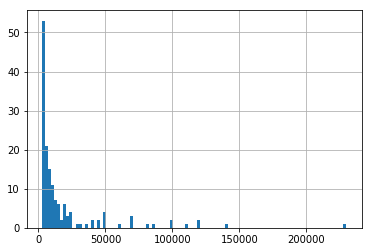

In [12]:
picher['연봉(2018)'].hist(bins=100)  # 2018년도 연봉 예측 자료 출력

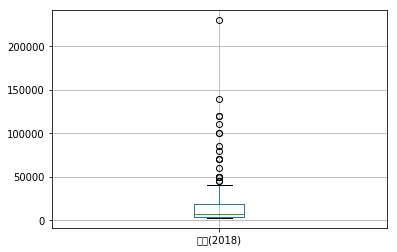

In [14]:
picher.boxplot(column=['연봉(2018)'])

In [15]:
# 상자그림(boxplot) 데이터의 사분위 값 특성을 이용하여 데이터 분포를 파악하는 그림
# 한국어는 깨지기 때문에 따로 설정이 필요함

In [19]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

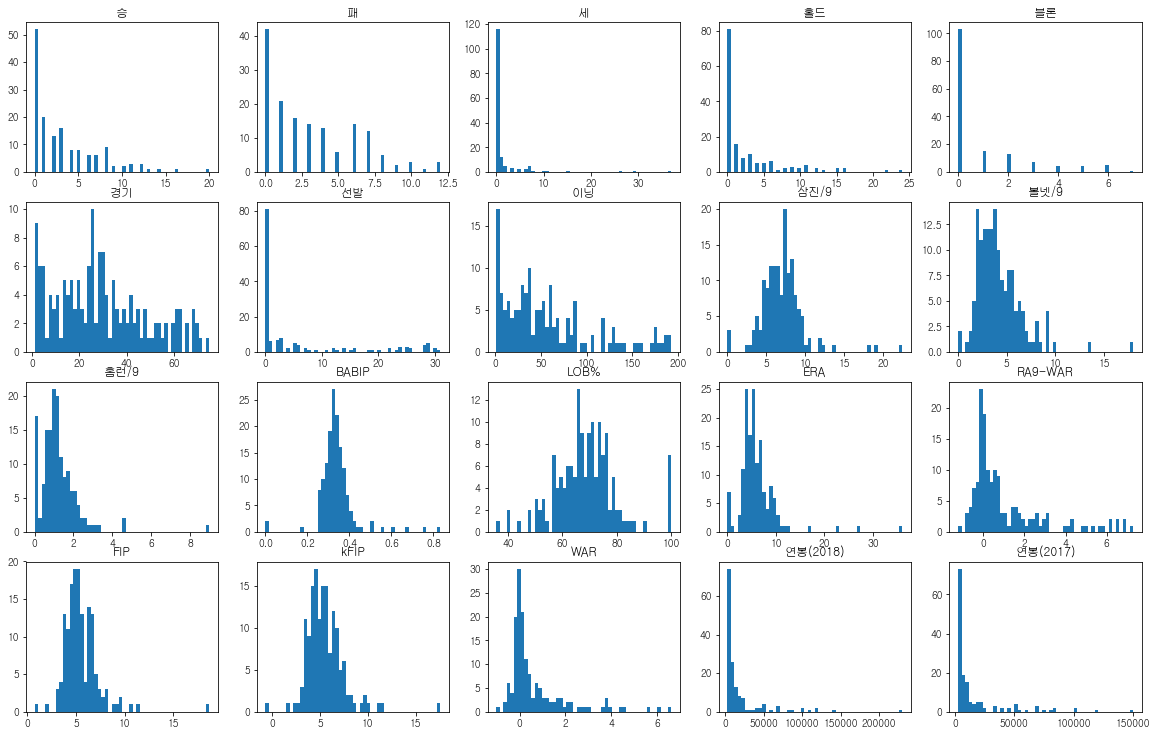

In [27]:
from matplotlib import font_manager, rc   # 한글 깨짐 오류를 해결하기 위한 경로 설정
font_path= "C:/Windows/Fonts/NGULIM.TTF"   
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df)